### Laporan Keuangan Konsolidasian

In [4]:
import pandas as pd

file_path = "LK_konsol_2019_2024.csv"

# Baca CSV dengan delimiter titik koma dan hilangkan spasi berlebih
df = pd.read_csv(file_path, sep=';', engine='python')
df.columns = df.columns.str.strip()  # bersihkan spasi di nama kolom

# Tampilkan ringkasan
print("Jumlah baris dan kolom:", df.shape)
print("\nKolom yang tersedia:", df.columns.tolist())

# Tampilkan 10 baris pertama
pd.set_option('display.float_format', '{:,.0f}'.format)
print("\nCuplikan data:")
print(df.head(10))


Jumlah baris dan kolom: (14, 7)

Kolom yang tersedia: ['Unnamed: 0', '2024', '2023', '2022', '2021', '2020', '2019']

Cuplikan data:
           Unnamed: 0                   2024                   2023  \
0  Aset Non Investasi    41.280.026.993.914     40.439.235.781.192    
1      Aset Investasi   356.297.037.280.697    336.546.736.507.695    
2            Deposito    72.548.141.446.060     46.030.507.000.000    
3               Saham    12.661.883.183.200     15.064.505.449.137    
4          Reksa Dana    22.158.998.452.824     27.004.209.841.471    
5            Obligasi   185.976.378.709.331    183.979.814.824.707    
6               Sukuk    52.398.427.105.755     52.538.398.423.536    
7                 MTN     3.472.688.997.995      5.310.965.008.500    
8                SRBI        23.335.250.000                    -      
9             KIK-EBA       577.649.528.905        723.742.454.783    

                    2022                   2021                   2020  \
0    35.718

### Laporan Laba Rugi

In [5]:
import pandas as pd

file_path = "LLR_2019_2024.csv"

# Baca CSV dengan delimiter titik koma dan hilangkan spasi berlebih
df = pd.read_csv(file_path, sep=';', engine='python')
df.columns = df.columns.str.strip()  # bersihkan spasi di nama kolom

# Tampilkan ringkasan
print("Jumlah baris dan kolom:", df.shape)
print("\nKolom yang tersedia:", df.columns.tolist())

# Tampilkan 10 baris pertama
pd.set_option('display.float_format', '{:,.0f}'.format)
print("\nCuplikan data:")
print(df.head(10))


Jumlah baris dan kolom: (13, 7)

Kolom yang tersedia: ['Unnamed: 0', '2024', '2023', '2022', '2021', '2020', '2019']

Cuplikan data:
                         Unnamed: 0                  2024  \
0          Pendapatan Non Investasi   10.411.749.661.628    
1              Pendapatan Investasi    9.011.566.535.853    
2                  Total Pendapatan   19.423.316.197.481    
3     Jumlah beban klaim dan mafaat    16.333.036.580.042   
4                  Beban investasi         10.210.737.093   
5               Beban non investasi    1.800.911.448.894    
6  Jumlah beban usaha entitas induk    1.811.122.185.987    
7          Beban usaha entitas anak       288.538.141.918   
8                Jumlah beban usaha    2.099.660.327.905    
9           Penggantian BOP Pensiun      -662.738.398.520   

                   2023                  2022                  2021  \
0   13.644.235.295.100    32.228.013.336.969    10.657.824.909.555    
1    8.487.018.199.018     9.027.881.205.692     9.77

### Laporan Arus Kas

In [6]:
import pandas as pd

file_path = "LAK_2019_2024.csv"

# Baca CSV dengan delimiter titik koma dan hilangkan spasi berlebih
df = pd.read_csv(file_path, sep=';', engine='python')
df.columns = df.columns.str.strip()  # bersihkan spasi di nama kolom

# Tampilkan ringkasan
print("Jumlah baris dan kolom:", df.shape)
print("\nKolom yang tersedia:", df.columns.tolist())

# Tampilkan 10 baris pertama
pd.set_option('display.float_format', '{:,.0f}'.format)
print("\nCuplikan data:")
print(df.head(10))


Jumlah baris dan kolom: (6, 7)

Kolom yang tersedia: ['Unnamed: 0', '2024', '2023', '2022', '2021', '2020', '2019']

Cuplikan data:
                                       Unnamed: 0                  2024  \
0          Arus Kas Bersih dari Kegiatan Operasi    18.537.196.660.808    
1        Arus Kas Bersih dari Kegiatan Investasi    -18.536.413.896.270   
2         Arus Kas Bersih dari Kegiatan Pendanaan          534.118.523    
3  Kenaikan (Penurunan) Bersih Kas dan Setara Kas        1.316.883.061    
4            Kas dan Setara Kas pada Awal Periode       32.516.548.394    
5           Kas dan Setara Kas pada Akhir Periode       33.833.431.455    

                   2023                  2022                  2021  \
0   14.911.028.297.326    13.264.371.674.898    14.263.407.677.434    
1   -15.134.676.775.331   -13.848.919.922.316   -13.482.495.960.861   
2        3.347.623.351         -3.785.432.589       32.238.215.858    
3     (220.300.854.654)     (588.333.680.007)      813.149

Klasifikasi AKun

In [7]:
import pandas as pd

# 1️⃣ Baca file CSV dengan delimiter titik koma
file_path = "LK_konsol_2019_2024.csv"
df = pd.read_csv(file_path, sep=';', engine='python')
df.columns = df.columns.str.strip()

# 2️⃣ Bersihkan kolom angka dari titik pemisah ribuan
for col in df.columns[1:]:
    df[col] = (
        df[col]
        .astype(str)
        .str.replace('.', '', regex=False)
        .str.replace(',', '.', regex=False)
        .str.replace('-', '0')
        .astype(float)
    )

# 3️⃣ Buat kategori awal berdasarkan kata kunci
def classify(account):
    name = account.lower()
    if any(k in name for k in ["aset", "investasi", "deposito", "saham", "reksa", "obligasi", "sukuk", "mtn", "srbi", "eba", "properti"]):
        return "Aset"
    elif any(k in name for k in ["cadangan", "kewajiban", "liabilitas"]):
        return "Liabilitas"
    elif any(k in name for k in ["modal", "ekuitas", "laba ditahan"]):
        return "Ekuitas"
    elif any(k in name for k in ["pendapatan", "hasil investasi", "klaim", "beban"]):
        return "Pendapatan/Beban"
    else:
        return "Lainnya"

df["Kategori"] = df.iloc[:, 0].apply(classify)

# 4️⃣ Susun ulang kolom agar rapi
cols = ["Kategori", df.columns[0]] + list(df.columns[1:-1])
df = df[cols]

# 5️⃣ Tampilkan ringkasan hasil klasifikasi
print(df[["Kategori", df.columns[1]]].head(15))
print("\nJumlah akun per kategori:")
print(df["Kategori"].value_counts())


      Kategori          Unnamed: 0
0         Aset  Aset Non Investasi
1         Aset      Aset Investasi
2         Aset            Deposito
3         Aset               Saham
4         Aset          Reksa Dana
5         Aset            Obligasi
6         Aset               Sukuk
7         Aset                 MTN
8         Aset                SRBI
9         Aset             KIK-EBA
10        Aset   Investasi Lainnya
11        Aset          Total Aset
12  Liabilitas    Total Liabilitas
13     Ekuitas       Total Ekuitas

Jumlah akun per kategori:
Kategori
Aset          12
Liabilitas     1
Ekuitas        1
Name: count, dtype: int64


Trends


=== Ringkasan Neraca 2019–2024 ===
  Tahun          Total Aset    Total Liabilitas      Total Ekuitas  \
0  2019 263,253,503,709,778 251,837,606,675,034 11,415,897,034,744   
1  2020 287,395,061,269,757 273,457,483,137,594 13,937,578,132,163   
2  2021 306,731,495,474,281 294,151,019,847,555 12,580,475,626,726   
3  2022 345,669,639,736,177 334,660,090,070,713 11,009,549,665,464   
4  2023 376,985,972,288,887 364,360,933,374,845 12,625,038,914,042   
5  2024 397,577,064,274,611 386,414,925,645,838 11,162,138,628,773   

       Aset Investasi  Liab/Asset  Equity/Asset  YoY Aset Investasi  \
0 253,321,566,937,984           1             0                 NaN   
1 274,939,160,444,203           1             0                   0   
2 293,208,531,304,979           1             0                   0   
3 309,951,287,818,183           1             0                   0   
4 336,546,736,507,695           1             0                   0   
5 356,297,037,280,697           1             0

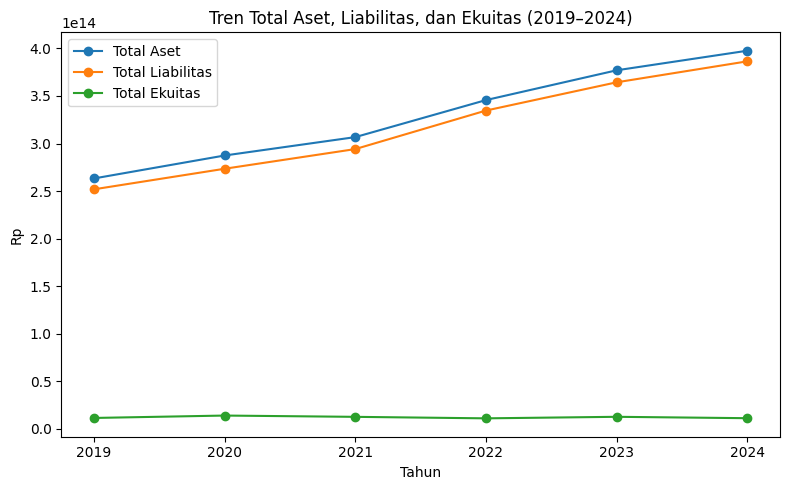

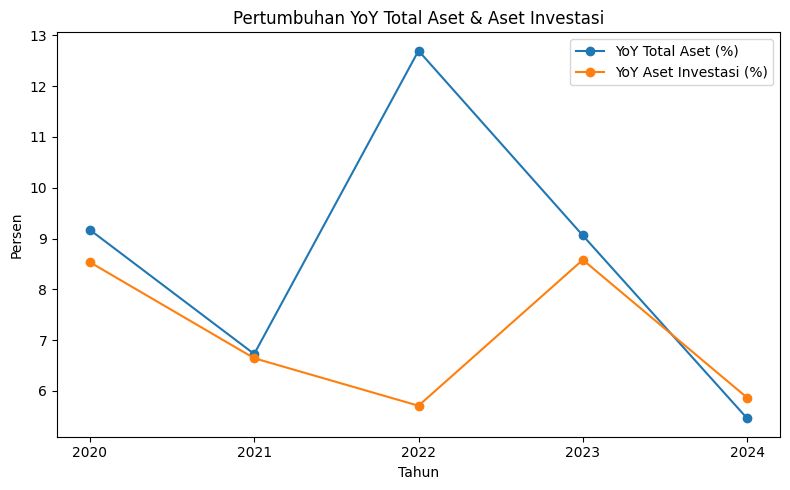

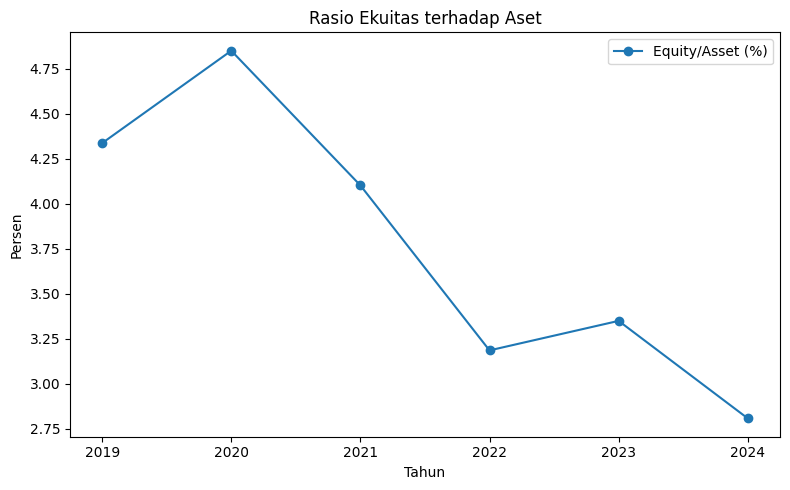

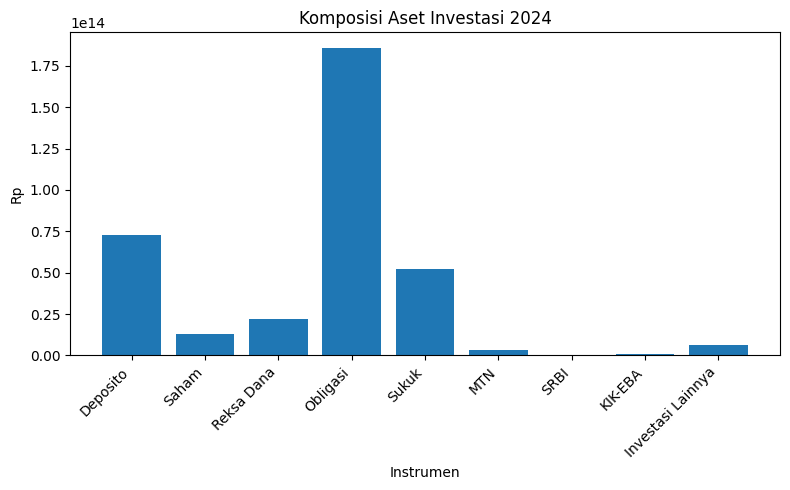

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load & bersihkan data
file_path = Path("LK_konsol_2019_2024.csv")

df = pd.read_csv(file_path, sep=';', engine='python')
df.columns = df.columns.str.strip()
df = df.rename(columns={df.columns[0]: "Akun"})
df["Akun"] = df["Akun"].str.strip()

year_cols = [c for c in df.columns if c.isdigit()]
year_cols_sorted = sorted(year_cols)

def to_number(s):
    s = str(s).strip()
    if s in {"-", "", "nan", "None"}:
        return 0.0
    s = s.replace(".", "").replace(",", ".")
    try:
        return float(s)
    except ValueError:
        return np.nan

for c in year_cols_sorted:
    df[c] = df[c].apply(to_number)

# Ambil baris utama
def get_row_value(name):
    mask = df["Akun"].str.lower().eq(name.lower())
    return df.loc[mask, year_cols_sorted].squeeze() if mask.any() else pd.Series([np.nan]*len(year_cols_sorted), index=year_cols_sorted)

total_aset = get_row_value("Total Aset")
total_liab = get_row_value("Total Liabilitas")
total_ekuitas = get_row_value("Total Ekuitas")
aset_investasi = get_row_value("Aset Investasi")

# Buat tabel ringkasan
summary = pd.DataFrame({
    "Tahun": year_cols_sorted,
    "Total Aset": total_aset.values,
    "Total Liabilitas": total_liab.values,
    "Total Ekuitas": total_ekuitas.values,
    "Aset Investasi": aset_investasi.values
})
summary["Liab/Asset"] = summary["Total Liabilitas"] / summary["Total Aset"]
summary["Equity/Asset"] = summary["Total Ekuitas"] / summary["Total Aset"]
summary["YoY Aset Investasi"] = summary["Aset Investasi"].pct_change()
summary["YoY Total Aset"] = summary["Total Aset"].pct_change()

print("\n=== Ringkasan Neraca 2019–2024 ===")
print(summary.round(2))

# Komposisi portofolio tahun terbaru
latest = year_cols_sorted[-1]
portfolio_items = ["Deposito", "Saham", "Reksa Dana", "Obligasi", "Sukuk", "MTN", "SRBI", "KIK-EBA", "Investasi Lainnya"]
composition = {item: get_row_value(item).get(latest, np.nan) for item in portfolio_items}
composition = pd.DataFrame(list(composition.items()), columns=["Akun", "Nilai"]).dropna()
composition = composition[composition["Nilai"] != 0]

print(f"\n=== Komposisi Aset Investasi {latest} ===")
print(composition.sort_values("Nilai", ascending=False))

# Visualisasi
plt.figure(figsize=(8,5))
plt.plot(summary["Tahun"], summary["Total Aset"], marker='o', label="Total Aset")
plt.plot(summary["Tahun"], summary["Total Liabilitas"], marker='o', label="Total Liabilitas")
plt.plot(summary["Tahun"], summary["Total Ekuitas"], marker='o', label="Total Ekuitas")
plt.title("Tren Total Aset, Liabilitas, dan Ekuitas (2019–2024)")
plt.legend(); plt.xlabel("Tahun"); plt.ylabel("Rp"); plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(summary["Tahun"], summary["YoY Total Aset"]*100, marker='o', label="YoY Total Aset (%)")
plt.plot(summary["Tahun"], summary["YoY Aset Investasi"]*100, marker='o', label="YoY Aset Investasi (%)")
plt.title("Pertumbuhan YoY Total Aset & Aset Investasi")
plt.legend(); plt.xlabel("Tahun"); plt.ylabel("Persen"); plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(summary["Tahun"], summary["Equity/Asset"]*100, marker='o', label="Equity/Asset (%)")
plt.title("Rasio Ekuitas terhadap Aset")
plt.legend(); plt.xlabel("Tahun"); plt.ylabel("Persen"); plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.bar(composition["Akun"], composition["Nilai"])
plt.title(f"Komposisi Aset Investasi {latest}")
plt.xlabel("Instrumen"); plt.ylabel("Rp"); plt.xticks(rotation=45, ha="right")
plt.tight_layout(); plt.show()
